In [ ]:
#######################################
## SIS 420                           ##
## Alumno: Sanchez Calvimontes Pablo ##
## Carrera: Ingenieria de Sistemas   ##
#######################################

# EXAMEN FINAL DE SIS420 - INTELIGENCIA ARTIFICIAL

# A CONTINUACION SE DESCRIBIRA LOS PASOS QUE SE REALIZARON PARA ESTE EJERCICIO

# Primero se hizo la importación de librerías: Se importan las siguientes librerías necesarias para el funcionamiento del código:
# random-  math-  tqdm: Para visualizar una barra de progreso durante la ejecución del algoritmo genético
# copy-  matplotlib.pyplot

# despuies se crea la funcion  "init_pop" que genera una población inicial aleatoria
# la funcion "fitness_score"  calcula la aptitud de cada individuo en la población
# se crean las listas fitness_values y num vacías
# se itera sobre la población y se convierte cada cromosoma de números binarios en un número decimal
# despuies de realizar los calculos respectivos se devuelven las listas fitness_values y population que contienen los valores de aptitud y la población ordenados respectivamente

# despues se crea la función "select_parent" que selecciona padres de forma aleatoria esto para luego ser usados en la
# función "crossover" que realiza el cruce entre padres

# la función mutation: Realiza la mutación en la población
# Se obtiene la longitud del cromosoma de los individuos en la población
# Se itera sobre cada individuo y cada gen del cromosoma

# Función SGA: Ejecuta el Algoritmo Genético Simple.
# sSe inicializan las variables states, best_solution y best_score para almacenar la evolución de los puntajes y la mejor solución encontrada.
# se itera un número determinado de generaciones.

# En cada generación, se calcula la aptitud de la población actual y se obtiene el mejor puntaje y la mejor solución encontrada hasta el momento.
# Se seleccionan los padres, se realiza el cruce y la mutación en la población.
# Al final de cada generación, se actualiza el mejor puntaje y la mejor solución si se encuentra una solución mejor.
# Se devuelven la mejor solución, el mejor puntaje y la lista de puntajes en cada generación.

# los parametro se definen y pueden ser modificados para obtener diferentes resultados


#el código implementa un Algoritmo Genético Simple para resolver el problema de fijación de precios de bicicletas.
# Utiliza una población inicial aleatoria, calcula la aptitud de los individuos, selecciona padres, realiza el cruce y
# la mutación, y evoluciona a lo largo de un número determinado de generaciones. Al final, se obtiene la mejor solución
# encontrada y se muestra un gráfico de la evolución de los puntajes.

#EL RESULTADO DEL ALGORITMO SE ENCUENTRA AL FINAL DEL EJERCICIO
# Y PUEDE SER VERIFICADO PORQUE ES EL MEJOR VALOR POSIBLE


# Ejercicio 1 - v1 - Sis420

##  Fijación de precios de bicicletas usando un algoritmo genético simple
Suponga que una empresa quiere diseñar una bicicleta nueva y necesita considerar los siguientes costos:

- $700,000 costos para instalación de manufactura, marketing, etc.
- $110 costo por cada bicicleta producida

Basándose en bicicletas similares, la empresa espera que las ventas sigan esta curva de demanda:

$Q= 70,000 - 200P$,<br>
donde P es el precio y Q es el número de unidades vendidas a ese precio

- A \$200 la empresa venderia: 70000 - 200 * 200 = 30000 unds
- A \$300 la empresa venderia: 70000 - 200 * 300 = 10000 unds
- At \$350 la empresa no venderia nada 0 unds

La ganancia se calcularía de la siguiente manera:

$Profit=Sales-Costs$<br>
$Profit=P(70,000-200P)-(700,000+110(70,000-200P))$<br>
$Profit=-200P^2+92,000P-8,400,000$

In [ ]:
import random
import math
from tqdm.notebook import tqdm
from copy import copy
import matplotlib.pyplot as plt

### Poblacion Inicial

In [ ]:
# Generamos una poblacion inicial de forma aleatoria
def init_pop(pop_size, chromosome_length):
    ints = [random.randint(0,350) for i in range(pop_size)]
    strs = [bin(n)[2:].zfill(chromosome_length) for n in ints]
    bins = [[int(x) for x in n] for n in strs]
    return bins

### Fitness

In [ ]:
# Para una poblacion dada se calcula el fitness
def fitness_score(population):
    fitness_values = []
    num = []
    for i in range(len(population)):
        num.append(int("".join(str(x) for x in population[i]), base=2))  # convert binary to decimal
        fitness_values.append(-200 * math.pow(num[i],2) + 92000 * num[i] - 8400000)
    tuples = zip(*sorted(zip(fitness_values,population),reverse=True))
    fitness_values, population = [list(t) for t in tuples]
    return fitness_values, population

In [ ]:
# la funcion fitnes_score primero convierte la poblacion en un numero binario o genotipo
# la funcion devuelve la mejor descendencia
# en resumen la funcion indica que tan bueno es un descendiente

### Seleccion de Padres - Cruce - Mutacion

In [ ]:
# Seleccionamos un padre de forma aleatoria
def select_parent(population, num_parents):
    parents=random.sample(population, num_parents)
    return parents

In [ ]:
# Aplicar cruce de 1 punto
def crossover(parents, crossover_prob):
    chromosome_length = len(parents[0])
    if crossover_prob > random.random():
        cross_point = random.randint(0,chromosome_length)
        parents+= tuple([(parents[0][0:cross_point +1] +parents[1][cross_point+1:(chromosome_length+1)])])
        parents+= tuple([(parents[1][0:cross_point +1] +parents[0][cross_point+1:(chromosome_length+1)])])
    return parents

In [ ]:
# La función de cruce aquí primero determina si se produce un cruce (usando el crossover_prob)
# y luego selecciona un punto de cruce aleatorio en el cromosoma. Usando cruce de 1 punto
# las mitades inferiores se intercambian los padres.

'La función de cruce aquí primero determina si se produce un cruce (usando el crossover_prob) \ny luego selecciona un punto de cruce aleatorio en el cromosoma. Usando cruce de 1 punto\nlas mitades inferiores se intercambian los padres.'

In [ ]:
# Modificamos cada gen de forma independiente con una probabilidad 'mutación_prob'
def mutation(population, mutation_prob) :
    chromosome_length = len(population[0])
    for i in range(len(population)-1) :
        for j in range(chromosome_length-1) :
            if mutation_prob > random.random():
                if population[i][j]==1:
                    population[i][j]=0
                else:
                    population[i][j]=1
    return population

### Solucion

In [ ]:
def SGA(population, num_gen, num_parents, crossover_prob, mutation_prob, use_tqdm = False):
    states = []
    best_solution = []
    best_score = 0
    if use_tqdm: pbar = tqdm(total=num_gen)
    for _ in range(num_gen):
        if use_tqdm: pbar.update()
        # Get population fitness
        scores, population = fitness_score(population)
        current_best_score = scores[0]
        current_best_solution = population[0]
        states.append(current_best_score)
        if current_best_score > best_score:
            best_score = current_best_score
            best_solution = int("".join(str(x) for x in copy(current_best_solution)), base=2)
        parents = select_parent(population, num_parents)
        parents = crossover(parents, crossover_prob)
        population = mutation(population,mutation_prob)
    return best_solution, best_score, states

### Parameters

In [ ]:
# SGA Parameters
num_gen = 20000
pop_size = 70
crossover_prob = 0.7
mutation_prob = 0.3
num_parents = 2

# Solution representation
chromosome_length = 9
best_score = -100000

# Initialize the "best solution"
population = init_pop(pop_size, chromosome_length)

### Results and Visualization

  0%|          | 0/20000 [00:00<?, ?it/s]

Mejor Solucion: 230
Best Score: 2180000.0


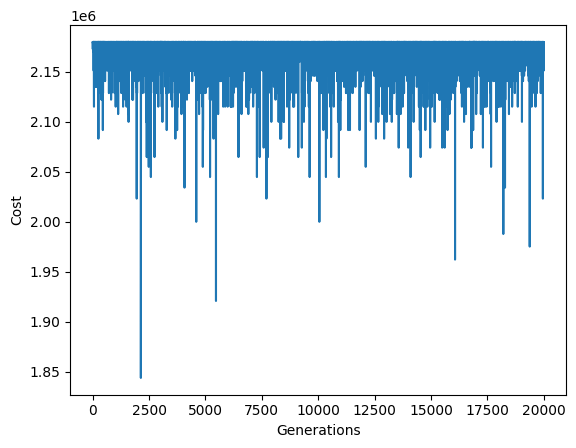

In [ ]:
best_solution, best_score, states = SGA(
    population, num_gen, num_parents, crossover_prob, mutation_prob, use_tqdm=True
)

print(f"Mejor Solucion: {best_solution}")
print(f"Best Score: {best_score}")
plt.plot(states)
plt.xlabel("Generations")
plt.ylabel("Cost")
plt.show()



We can also easily verify that the solution is indeed **230**, as the maximum of the profit function (solution to the derivative) is 230:

$Profit=-200P^2+92,000P-8,400,000$<br>
$\frac{dP}{dProfit}=-400P + 92000$<br>
Set $\frac{dP}{dProfit}=0$<br>
$400P = 92000$<br>
$P=230$